In [18]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

results_random_wo_test_file = "results_without_test_random.p"
result_random_file = "results_random.p"
results_wo_test_file = "results_without_test.p"
result_file = "results.p"

In [19]:
try:
    with open(result_file, 'rb') as f:
        results = pk.load(f, encoding='latin1')
except:
    print("No result")
try:
    with open(results_wo_test_file, 'rb') as f:
        results_wo_test = pk.load(f, encoding='latin1')
except:
    print("No result without test")
try:
    with open(result_random_file, 'rb') as f:
        results_random = pk.load(f, encoding='latin1')
except:
    print("No random result")
try:
    with open(results_random_wo_test_file, 'rb') as f:
        results_wo_test_random = pk.load(f, encoding='latin1')
except:
    print("No random result without test")

In [20]:
def get_split_data(data):
    x_gcnn = []
    y_gcnn = []
    x_gcnn_sampled = []
    y_gcnn_sampled = []
    for tup in data:
        if tup[0] == 'gcn_subsampled':
            x_gcnn_sampled.append(tup[1])
            y_gcnn_sampled.append(tup[2])
        else:
            x_gcnn.append(tup[1])
            y_gcnn.append(tup[2])
    
    print(x_gcnn)
    print(y_gcnn)
    print(x_gcnn_sampled)
    print(y_gcnn_sampled)
    return x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled

def plot(title, save_file):
    plt.plot(x_gcnn, y_gcnn_sampled, 'r-')
    plt.plot(x_gcnn, y_gcnn, 'b-')
    plt.plot(23,0.81,'ko')
    plt.xlabel('known labels of training set %')
    plt.ylabel('test accuracy')
    plt.title(title)
    plt.grid(True)
    blue_patch = mpatches.Patch(color='blue', label='gcnn')
    red_patch = mpatches.Patch(color='red', label='sampled gcnn')
    plt.legend(handles=[red_patch,blue_patch],loc=4)
    plt.savefig(save_file)

[1, 4, 8, 13, 22, 33, 100]
[0.57799941, 0.76099902, 0.79899907, 0.81399912, 0.84499919, 0.8399992, 0.87499928]
[1, 4, 8, 13, 22, 33, 100]
[0.49599966, 0.71999907, 0.77799898, 0.80499905, 0.83699918, 0.83599919, 0.87499928]


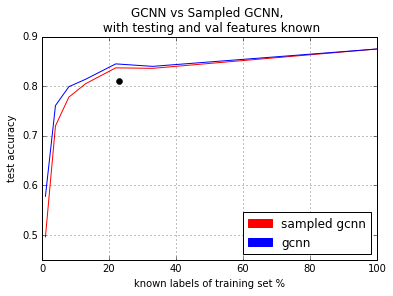

In [21]:
x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled = get_split_data(results)
plot('GCNN vs Sampled GCNN, \n with testing and val features known', 'GCNNvs_with_test.png')

[1, 4, 8, 13, 22, 33, 100]
[0.50799966, 0.65999925, 0.71599907, 0.73499906, 0.75699902, 0.76199907, 0.77399898]
[1, 4, 8, 13, 22, 33, 100]
[0.17799999, 0.35599998, 0.45399979, 0.51799959, 0.58999944, 0.6239993, 0.77399898]


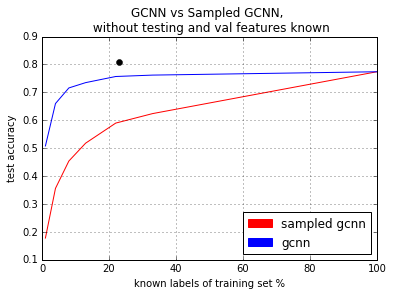

In [22]:
x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled = get_split_data(results_wo_test)
plot('GCNN vs Sampled GCNN, \n without testing and val features known', 'GCNNvs_without_test.png')


[4, 9, 19, 29, 50, 75, 100]
[0.63399929, 0.69899911, 0.70099914, 0.74199909, 0.73499906, 0.77599901, 0.77399898]
[4, 9, 19, 29, 50, 75, 100]
[0.32600001, 0.50699967, 0.5449996, 0.61899936, 0.68099916, 0.73499912, 0.77399898]


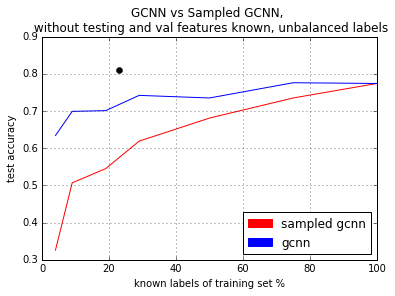

In [23]:
x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled = get_split_data(results_wo_test_random)
plot('GCNN vs Sampled GCNN, \n without testing and val features known, unbalanced labels', 'GCNNvs_without_test_random.png')


[4, 9, 19, 29, 50, 75, 100]
[0.64299929, 0.78299904, 0.83099914, 0.84199917, 0.86999929, 0.86799926, 0.87499928]
[4, 9, 19, 29, 50, 75, 100]
[0.68299919, 0.75299901, 0.82299912, 0.83799917, 0.85999924, 0.87099928, 0.87499928]


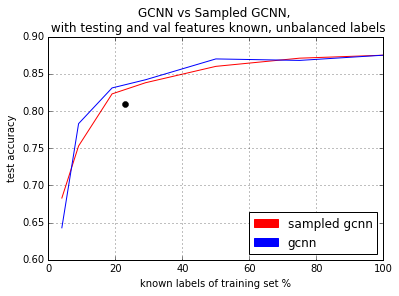

In [24]:
x_gcnn, y_gcnn, x_gcnn_sampled, y_gcnn_sampled = get_split_data(results_random)
plot('GCNN vs Sampled GCNN, \n with testing and val features known, unbalanced labels', 'GCNNvs_with_random.png')
